In [1]:
import numpy as np
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
import pandas as pd

Using TensorFlow backend.


In [2]:
df = pd.read_csv('Multiple_Forms.csv', index_col=0)
df.head()

,Author,Poem,Form
0,William Shakespeare,"From fairest creatures we desire increase,\r\n...",Sonnet
1,William Shakespeare,"When forty winters shall besiege thy brow,\r\n...",Sonnet
2,William Shakespeare,Look in thy glass and tell the face thou viewe...,Sonnet
3,William Shakespeare,"Unthrifty loveliness, why dost thou spend\r\n ...",Sonnet
4,William Shakespeare,"Those hours, that with gentle work did frame\r...",Sonnet


In [3]:
from keras import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [4]:
num_words = 14000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df.Poem)

In [5]:
sequences = tokenizer.texts_to_sequences(df.Poem)

In [6]:
X = np.array(sequences)

In [7]:
y = df.drop(['Author','Poem'], axis=1)

In [8]:
y = pd.get_dummies(y)

In [9]:
y.values[0]

array([0, 0, 0, 1], dtype=uint8)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, random_state=20)

In [11]:
y_train.shape

(402, 4)

In [12]:
y_train[0]

array([0, 0, 0, 1], dtype=uint8)

In [13]:
maxlen = 250
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

In [20]:
X_train[80]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [96]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(num_words, 8, input_length=maxlen))                         

model.add(Flatten())                                                        

model.add(Dense(4, activation='softmax'))                                   
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 250, 8)            112000    
_________________________________________________________________
flatten_8 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 8004      
Total params: 120,004
Trainable params: 120,004
Non-trainable params: 0
_________________________________________________________________


C:\Users\kyle_\anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 321 samples, validate on 81 samples
Epoch 1/10
321/321 [==============================] - 0s 525us/step - loss: 1.2116 - acc: 0.5358 - val_loss: 0.9521 - val_acc: 0.7160
Epoch 2/10
321/321 [==============================] - 0s 206us/step - loss: 0.8912 - acc: 0.8224 - val_loss: 0.7459 - val_acc: 0.7284
Epoch 3/10
321/321 [==============================] - 0s 210us/step - loss: 0.7327 - acc: 0.8505 - val_loss: 0.6322 - val_acc: 0.7778
Epoch 4/10
321/321 [==============================] - 0s 208us/step - loss: 0.6351 - acc: 0.8723 - val_loss: 0.5618 - val_acc: 0.7901
Epoch 5/10
321/321 [==============================] - 0s 206us/step - loss: 0.5575 - acc: 0.8723 - val_loss: 0.5140 - val_acc: 0.7901
Epoch 6/10
321/321 [==============================] - 0s 234us/step - loss: 0.5002 - acc: 0.8941 - val_loss: 0.4769 - val_acc: 0.7901
Epoch 7/10
321/321 [==============================] - 0s 316us/step - loss: 0.4456 - acc: 0.9128 - val_loss: 0.4545 - val_acc: 0.7901
Epoch 8/10
321/32

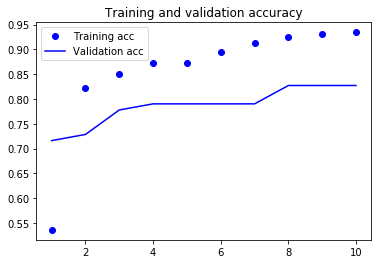

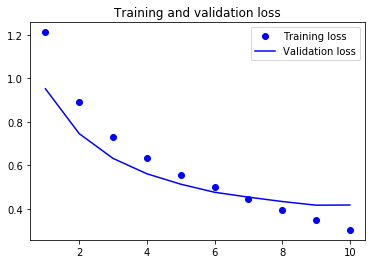

In [97]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()